# Customer Churn Analysis

## Introduction
This notebook aims to analyze customer churn data using various machine learning techniques. 
Customer churn refers to when customers stop doing business with a company, and understanding 
the factors contributing to churn is crucial for improving customer retention.

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Churn_Modelling_Indian.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Nair,619,Hyderabad,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Chopra,608,Delhi,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Reddy,502,Delhi,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Reddy,699,Delhi,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Agarwal,850,Mumbai,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No null value is present in the dataset

## Dropping Irrelevant Features

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Here 'RowNumber', 'CustomerId', 'Surname' are unique identifiers for each row in the table.So removing it.

In [6]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Hyderabad,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Delhi,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Delhi,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Delhi,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Mumbai,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df['Geography'].unique()

array(['Hyderabad', 'Delhi', 'Mumbai', 'Bangalore', 'Lucknow',
       'Ahmedabad', 'Kolkata', 'Jaipur', 'Chennai', 'Pune'], dtype=object)

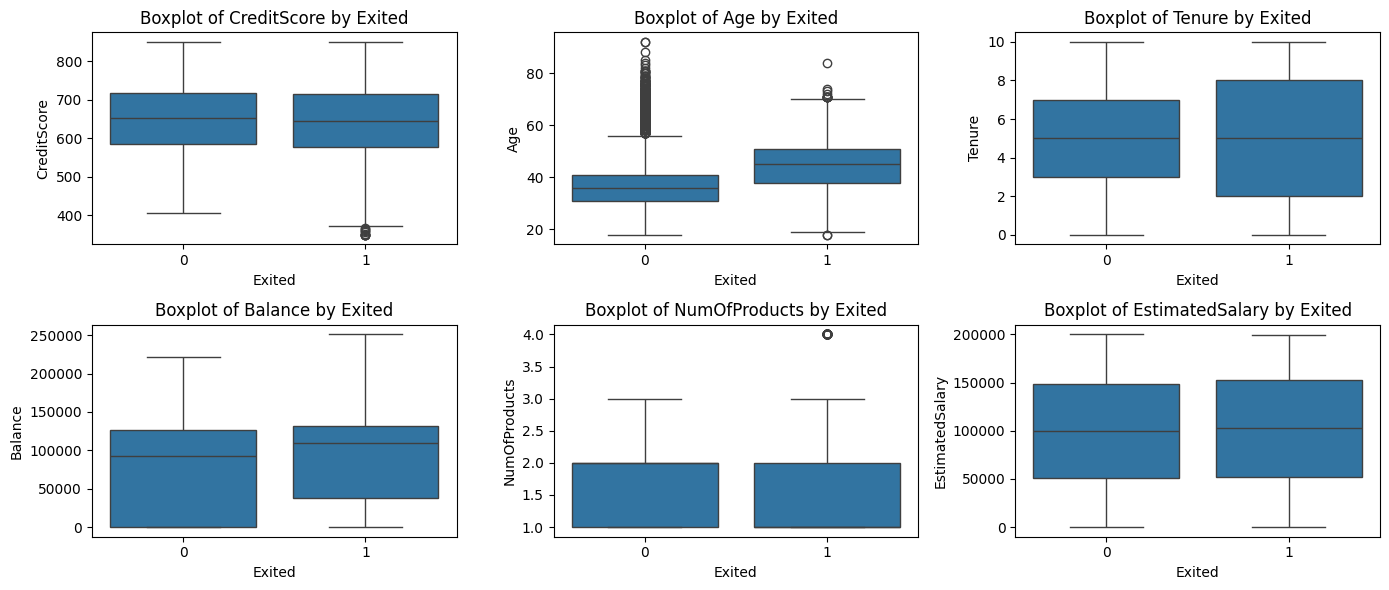

In [9]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.figure(figsize=(14, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Adjust layout for better visibility
    sns.boxplot(x='Exited', y=column, data=df)
    plt.title(f"Boxplot of {column} by Exited")
plt.tight_layout()
plt.show()

## Encoding Categorical Data

In [10]:
df = pd.get_dummies(df,drop_first = True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Bangalore,Geography_Chennai,Geography_Delhi,Geography_Hyderabad,Geography_Jaipur,Geography_Kolkata,Geography_Lucknow,Geography_Mumbai,Geography_Pune,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False,True,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,False,False,False,False,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,True,False,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,True,False,False,False,False,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,False,False,False,False,False,True,False,False


<h1>Correlational Analysis</h1>

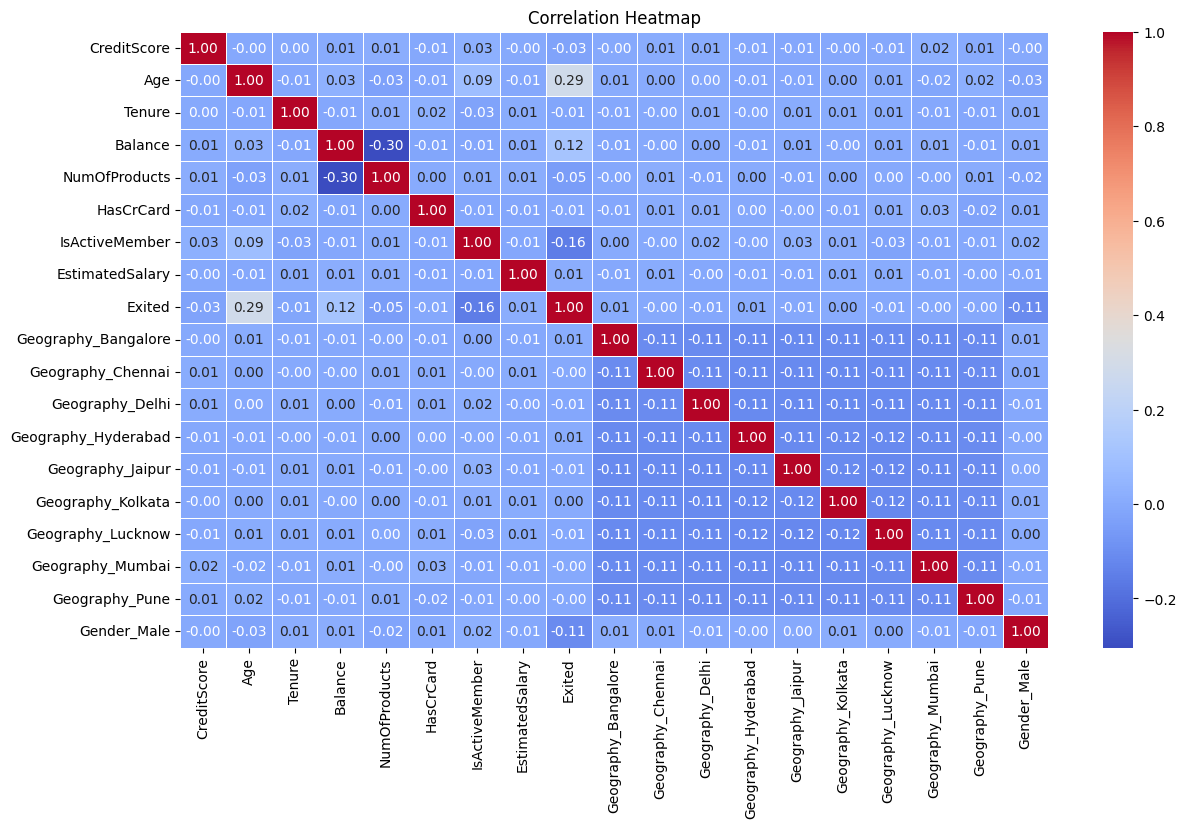

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Some insights about the target variable 

<Axes: xlabel='Exited', ylabel='count'>

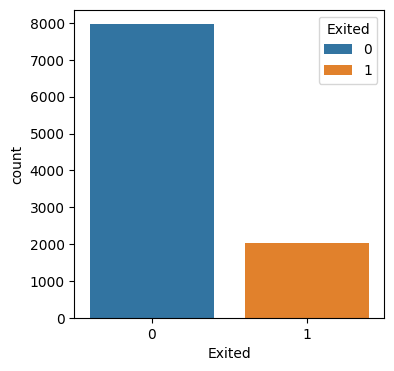

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(x='Exited', data=df,hue=df['Exited'])

Data is highly imbalanced , with a large number of negative samples and a small number of positive samples. This can lead to biased models that perform well on the majority class (negative samples) but poorly on the minority class (positive class). To address this, we are using technique SMOTE for oversampling the minority class

In [14]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [15]:
## Handling Imbalanced Data with SMOTE
from imblearn.over_sampling import SMOTE

X_res, y_res = SMOTE().fit_resample(X,y)

y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

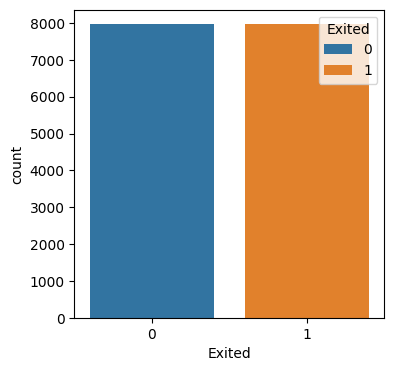

In [16]:
plt.figure(figsize=(4,4))
sns.countplot(x=y_res,hue=y_res)

<h1>Correlation After performing SMOTE</h1>

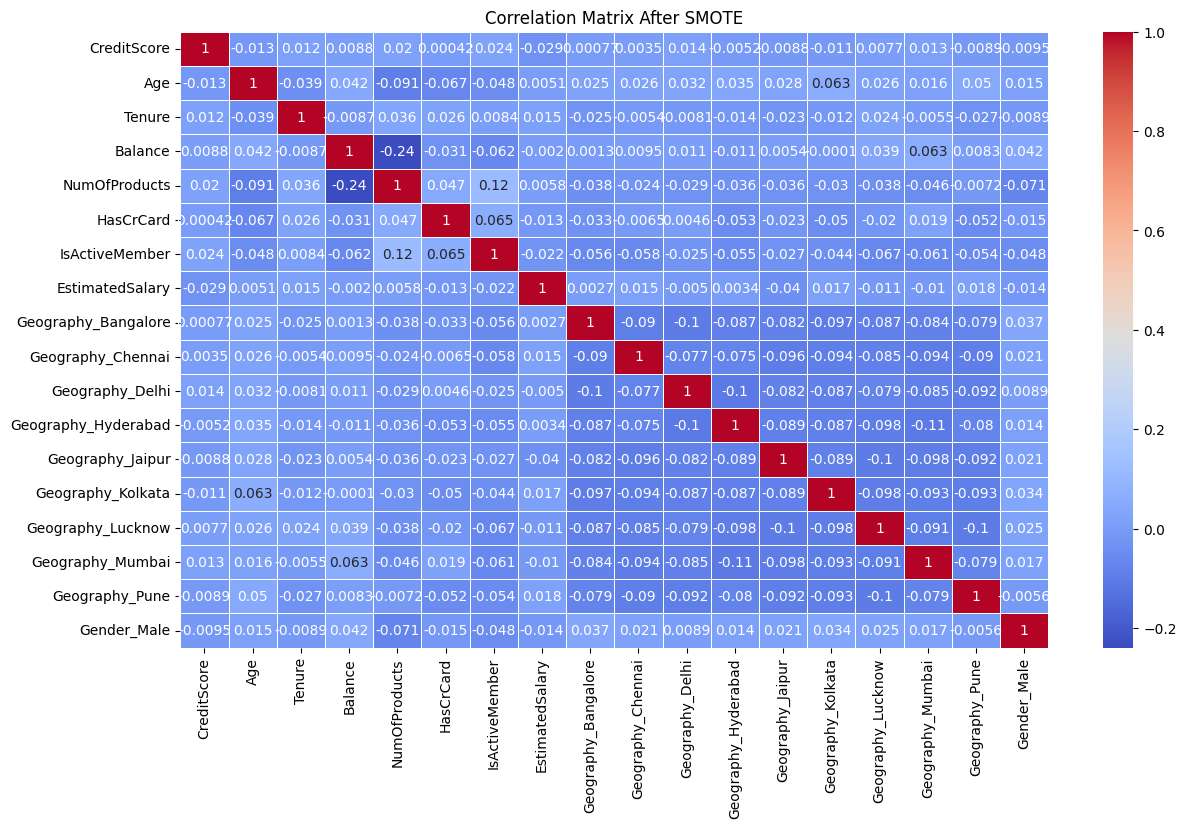

In [17]:
correlation_matrix = pd.DataFrame(X_res).corr()
#print(correlation_matrix)
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix After SMOTE")
plt.show()

In [18]:
X_res

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Bangalore,Geography_Chennai,Geography_Delhi,Geography_Hyderabad,Geography_Jaipur,Geography_Kolkata,Geography_Lucknow,Geography_Mumbai,Geography_Pune,Gender_Male
0,619,42,2,0.000000,1,1,1,101348.880000,False,False,False,True,False,False,False,False,False,False
1,608,41,1,83807.860000,1,0,1,112542.580000,False,False,True,False,False,False,False,False,False,False
2,502,42,8,159660.800000,3,1,0,113931.570000,False,False,True,False,False,False,False,False,False,False
3,699,39,1,0.000000,2,0,0,93826.630000,False,False,True,False,False,False,False,False,False,False
4,850,43,2,125510.820000,1,1,1,79084.100000,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,604,59,9,0.000000,1,1,0,150184.336294,False,False,False,False,False,False,False,False,True,True
15922,724,30,1,0.000000,2,1,0,164587.207022,False,False,False,False,False,False,True,False,True,True
15923,733,52,5,127256.584100,1,1,0,195501.334451,False,False,True,False,False,False,False,True,False,True
15924,813,34,9,142755.485895,1,0,1,69393.589252,False,False,False,False,False,True,False,True,False,False


In [19]:
y_res

0        1
1        0
2        1
3        0
4        0
        ..
15921    1
15922    1
15923    1
15924    1
15925    1
Name: Exited, Length: 15926, dtype: int64

## Feature Scaling

In [20]:
# Compute mean and standard deviation on the entire dataset
mean = np.mean(X_res, axis=0)
std = np.std(X_res, axis=0)

# Standard scale the entire dataset
X_scaled = (X_res - mean) / std

## Splitting The Dataset into Training Set and Test Set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.4, random_state=42)

In [22]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Bangalore,Geography_Chennai,Geography_Delhi,Geography_Hyderabad,Geography_Jaipur,Geography_Kolkata,Geography_Lucknow,Geography_Mumbai,Geography_Pune,Gender_Male
393,-1.010086,-0.296931,1.159031,-1.341902,1.017774,-1.302879,-0.763817,-1.744155,-0.397918,-0.393886,-0.381671,-0.404773,-0.396117,2.469881,-0.398341,-0.392928,-0.373421,0.812295
14602,-0.081689,-0.497620,0.059883,0.979381,-0.730588,0.767531,-0.763817,1.145770,-0.397918,-0.393886,2.620056,-0.404773,-0.396117,-0.404878,-0.398341,2.544994,-0.373421,-1.231080
6829,0.945009,0.204790,1.525414,0.744378,-0.730588,0.767531,1.309214,-0.484189,-0.397918,-0.393886,-0.381671,-0.404773,2.524509,-0.404878,-0.398341,-0.392928,-0.373421,0.812295
14671,0.027534,0.706512,-1.039265,-1.341902,-0.730588,0.767531,-0.763817,1.205207,2.513080,-0.393886,-0.381671,-0.404773,-0.396117,-0.404878,-0.398341,2.544994,-0.373421,0.812295
15062,-2.277075,0.004102,-0.306500,1.393207,1.017774,-1.302879,-0.763817,0.650637,2.513080,-0.393886,-0.381671,-0.404773,-0.396117,2.469881,-0.398341,-0.392928,-0.373421,-1.231080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,-0.496737,-0.397276,-0.672883,0.616535,-0.730588,-1.302879,-0.763817,1.660243,-0.397918,-0.393886,-0.381671,-0.404773,-0.396117,-0.404878,2.510409,-0.392928,-0.373421,0.812295
5390,0.945009,-0.296931,-1.405648,-1.341902,2.766136,-1.302879,-0.763817,-0.152072,-0.397918,-0.393886,-0.381671,-0.404773,-0.396117,-0.404878,2.510409,-0.392928,-0.373421,-1.231080
860,0.202291,0.204790,1.159031,1.763312,-0.730588,0.767531,-0.763817,-0.060367,2.513080,-0.393886,-0.381671,-0.404773,-0.396117,-0.404878,-0.398341,-0.392928,-0.373421,0.812295
15795,0.398893,0.505823,0.059883,1.151559,2.766136,-1.302879,1.309214,0.124409,2.513080,-0.393886,-0.381671,-0.404773,-0.396117,-0.404878,-0.398341,-0.392928,-0.373421,0.812295


### Evaluation Function

In [23]:
def accuracy_score_manual(y_true, y_pred):
    correct = sum(y_t == y_p for y_t, y_p in zip(y_true, y_pred))
    return correct / len(y_true)

def precision_score_manual(y_true, y_pred):
    tp = sum(y_t == 1 and y_p == 1 for y_t, y_p in zip(y_true, y_pred))
    fp = sum(y_t == 0 and y_p == 1 for y_t, y_p in zip(y_true, y_pred))
    return tp / (tp + fp) if (tp + fp) > 0 else 0.0

def recall_score_manual(y_true, y_pred):
    tp = sum(y_t == 1 and y_p == 1 for y_t, y_p in zip(y_true, y_pred))
    fn = sum(y_t == 1 and y_p == 0 for y_t, y_p in zip(y_true, y_pred))
    return tp / (tp + fn) if (tp + fn) > 0 else 0.0

def f1_score_manual(y_true, y_pred):
    precision = precision_score_manual(y_true, y_pred)
    recall = recall_score_manual(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score_manual(y_true, y_pred)
    precision = precision_score_manual(y_true, y_pred)
    recall = recall_score_manual(y_true, y_pred)
    f1 = f1_score_manual(y_true, y_pred)

    print("Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

## KNeighbors Classifier

In [31]:
# Euclidean distance function
def distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# KNN Classifier
def knn_classifier(train_features, train_labels, test_sample, k):

    # Compute distances between the test sample and all training points
    distances = np.array([distance(test_sample, train_features[i]) for i in range(train_features.shape[0])])
    
    # Get indices of the k-nearest neighbors
    k_indices = np.argsort(distances)[:k]
    
    # Get labels of the k-nearest neighbors
    k_nearest_labels = train_labels[k_indices]
    
    # Count the occurrences of each label
    unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
    
    # Determine the label with the highest count using argmax
    predicted_label = unique_labels[np.argmax(counts)]
    return predicted_label

# Convert y_train to NumPy array if it's a Pandas Series
if isinstance(y_train, pd.Series):
    y_train = y_train.to_numpy()

train_features = X_train.values  # Features of the training set
train_labels = y_train  # Labels of the training set

# Predict labels for the test set
k = 5
y_pred1 = np.array([knn_classifier(train_features, train_labels, sample, k) for sample in X_test.values])

# Ensure `y_pred1` has the same data type as `y_test`
y_pred1 = y_pred1.astype(type(y_test.iloc[0]) if hasattr(y_test, 'iloc') else type(y_test[0]))

# Evaluate the model
evaluate_model(y_test, y_pred1)


Model Evaluation Metrics:
Accuracy: 0.8330
Precision: 0.8507
Recall: 0.8037
F1 Score: 0.8265


(np.float64(0.8329932506670852),
 np.float64(0.8506711409395973),
 np.float64(0.8037412809131262),
 np.float64(0.8265405934137593))

## Logistic Regression

In [43]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the logistic regression function using gradient ascent
def logistic_regression(x_train, y_train, learn_rate=0.01, epsilon=0.01, max_iter=1000):
    
    # Add a column of ones to x_train for the intercept term
    x_train = np.column_stack((np.ones(x_train.shape[0]), x_train))
    # Initialize beta (coefficients) with zeros
    beta = np.zeros(x_train.shape[1])
    n = len(y_train)
    
    for i in range(max_iter):
        # Compute the linear combination of inputs and weights
        z = np.dot(x_train, beta)
        # Predicted probabilities using the sigmoid function
        p = sigmoid(z)
        # Compute the gradient: X^T(y - p)
        gradient = np.dot(x_train.T, (y_train - p)) / n
        # Update beta using gradient ascent
        beta_new = beta + learn_rate * gradient
        # Check for convergence
        if np.linalg.norm(beta_new - beta) < epsilon:
            print(f"Converged in {i+1} iterations.")
            break
        beta = beta_new
    else:
        print("Reached maximum iterations without convergence.")
    
    return beta

# Define the prediction function
def predict(x, beta):
 
    # Add a column of ones to x for the intercept term
    x = np.column_stack((np.ones(x.shape[0]), x))
    # Compute predicted probabilities
    p = sigmoid(np.dot(x, beta))
    # Return predicted classes (1 if p >= 0.5, otherwise 0)
    return (p >= 0.5).astype(int)

# Set hyperparameters
learn_rate = 0.5
epsilon = 0.01

# Train the logistic regression model
beta = logistic_regression(X_train, y_train, learn_rate=learn_rate, epsilon=epsilon)

# Make predictions on the test set
y_pred2 = predict(X_test, beta)

# Evaluate the model
evaluate_model(y_test, y_pred2)


Converged in 88 iterations.
Model Evaluation Metrics:
Accuracy: 0.8195
Precision: 0.8305
Recall: 0.7984
F1 Score: 0.8141


(np.float64(0.8194945848375451),
 np.float64(0.8304749340369393),
 np.float64(0.7983512999365885),
 np.float64(0.814096346589072))

## SVM

In [32]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [33]:
y_pred3=svm.predict(X_test)

In [34]:
evaluate_model(y_test, y_pred3)

Model Evaluation Metrics:
Accuracy: 0.8683
Precision: 0.9257
Recall: 0.7980
F1 Score: 0.8571


(np.float64(0.868309527546696),
 np.float64(0.9257079808753218),
 np.float64(0.7980342422320862),
 np.float64(0.8571428571428571))

## Desicion Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
y_pred4=dt.predict(X_test)

In [37]:
evaluate_model(y_test, y_pred4)

Model Evaluation Metrics:
Accuracy: 0.7718
Precision: 0.7614
Recall: 0.7850
F1 Score: 0.7730


(np.float64(0.7717783707424266),
 np.float64(0.7613776137761378),
 np.float64(0.7850348763474952),
 np.float64(0.7730252887917577))

## Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=None, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [39]:
y_pred5=rf.predict(X_test)


In [40]:
evaluate_model(y_test, y_pred5)

Model Evaluation Metrics:
Accuracy: 0.8660
Precision: 0.8756
Recall: 0.8500
F1 Score: 0.8626


(np.float64(0.8659551090880553),
 np.float64(0.8755715218811234),
 np.float64(0.8500317057704502),
 np.float64(0.8626126126126125))

## Performance Summary

In [44]:
performance_summary = pd.DataFrame({
    'Model':['KNN','LR','SVM','DT','RF'],
    'ACC':[accuracy_score_manual(y_test,y_pred1),
           accuracy_score_manual(y_test,y_pred2),
           accuracy_score_manual(y_test,y_pred3),
           accuracy_score_manual(y_test,y_pred4),
           accuracy_score_manual(y_test,y_pred5),
          ],
    'PRECISION':[precision_score_manual(y_test,y_pred1),
           precision_score_manual(y_test,y_pred2),
           precision_score_manual(y_test,y_pred3),
           precision_score_manual(y_test,y_pred4),
           precision_score_manual(y_test,y_pred5),
          ],
    'RECALL':[recall_score_manual(y_test,y_pred1),
           recall_score_manual(y_test,y_pred2),
           recall_score_manual(y_test,y_pred3),
           recall_score_manual(y_test,y_pred4),
           recall_score_manual(y_test,y_pred5),
          ],
    'F1':[f1_score_manual(y_test,y_pred1),
           f1_score_manual(y_test,y_pred2),
           f1_score_manual(y_test,y_pred3),
           f1_score_manual(y_test,y_pred4),
           f1_score_manual(y_test,y_pred5),
          ]

})

In [45]:
display(performance_summary)

,Model,ACC,PRECISION,RECALL,F1
0,KNN,0.832993,0.850671,0.803741,0.826541
1,LR,0.819495,0.830475,0.798351,0.814096
2,SVM,0.868310,0.925708,0.798034,0.857143
3,DT,0.771778,0.761378,0.785035,0.773025
4,RF,0.865955,0.875572,0.850032,0.862613


With above we can see that Random Forest is the best model for this dataset.